<a href="https://colab.research.google.com/github/ntsurayya/visualization_airline-ticket-price/blob/main/visualization_airline-ticket-price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><span style='background :red'>**Airline Ticket Price**

* Source: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
* Data was obtained from the "Ease My Trip" website which is a platform for passengers to book airplane tickets. 
* Data includes flight routes between top 6 metro cities in India.

In [16]:
import pandas as pd
import numpy as np


pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')

In [17]:
pathData = 'https://raw.githubusercontent.com/mrazakqq/data-science-learning/main/dataset/flight-price-prediction/Clean_Dataset.csv'
data = pd.read_csv(pathData)

In [18]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [19]:
types = data.dtypes
distinct = data.nunique()
count_na = data.isna().sum()
percent_na = round((data.isna().sum()/len(data))*100, 3)

print('dimensi data: ', data.shape)

data_check = pd.concat([types, distinct, count_na, percent_na], axis = 1)
data_check.reset_index(level = 0, inplace = True) 
data_check.rename(columns = {'index' : 'column', 0: 'types', 1: 'distinct', 2: 'count_na', 3: 'percent_na'}, inplace = True)
data_check

dimensi data:  (300153, 12)


,column,types,distinct,count_na,percent_na
0,Unnamed: 0,int64,300153,0,0.0
1,airline,object,6,0,0.0
2,flight,object,1561,0,0.0
3,source_city,object,6,0,0.0
4,departure_time,object,6,0,0.0
5,stops,object,3,0,0.0
6,arrival_time,object,6,0,0.0
7,destination_city,object,6,0,0.0
8,class,object,2,0,0.0
9,duration,float64,476,0,0.0


# Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid') 
sns.set_context('notebook', rc={'font.size':14, 'axes.titlesize':14, 'axes.labelsize':14})

## Descriptive Statistics

### Numerical Features

In [21]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### Categorical feature

In [22]:
data.describe(include='object').T

,count,unique,top,freq
airline,300153,6,Vistara,127859
flight,300153,1561,UK-706,3235
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
class,300153,2,Economy,206666


##Outliers

In [24]:
def findOutliers(df, dfColumn):
    q1 = np.quantile(df[dfColumn], 0.25)
    q3 = np.quantile(df[dfColumn], 0.75)
    iqr = q3 - q1
    cutOffWhisker = iqr * 1.5
    lowerWhisker = q1 - cutOffWhisker
    upperWhisker = q3 + cutOffWhisker
    outliersUpperDf = df[df[dfColumn] > upperWhisker]
    outliersLowerDf = df[df[dfColumn] < lowerWhisker]
    outliers = {
      'lowerWhisker': lowerWhisker,
      'upperWhisker': upperWhisker,
      'outliersUpperDf': outliersUpperDf,
      'outliersLowerDf': outliersLowerDf,
    }
    return outliers
    # return q1,q3

**Duration**

In [25]:
durationOutliers = findOutliers(data, 'duration')


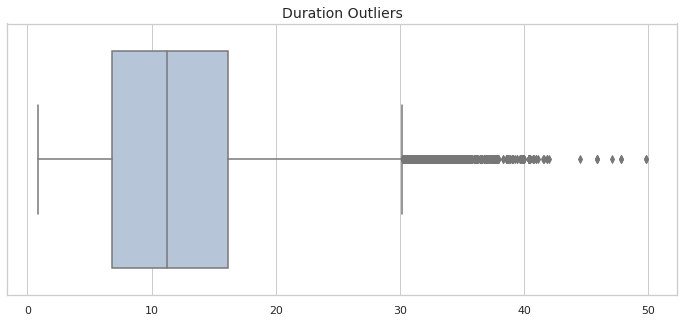

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style('whitegrid') 

sns.boxplot(x='duration', data=data, color='lightsteelblue')

ax.set_title('Duration Outliers')
ax.set_xlabel('')
plt.show()

The duration of a trip with a time exceeding 30 hours (30 - 50 hours) is an outlier, a data value that is far from other data values.

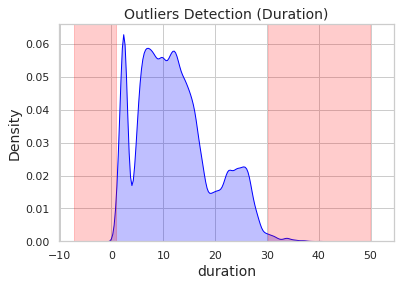

In [27]:
f, ax = plt.subplots()
sns.kdeplot(x=data.duration, color='b', shade=True)
plt.axvspan(xmin=durationOutliers['lowerWhisker'], xmax=data.duration.min(), alpha=0.2, color='r')
plt.axvspan(xmin=durationOutliers['upperWhisker'], xmax=data.duration.max(), alpha=0.2, color='r')

plt.title('Outliers Detection (Duration)')
plt.show()

**Days Left**

In [28]:
daysLeftOurliers = findOutliers(data, 'days_left')


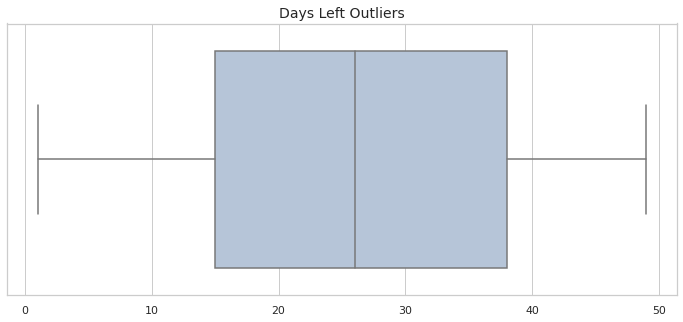

In [29]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style('whitegrid') 

sns.boxplot(x='days_left', data=data, color='lightsteelblue')

ax.set_title('Days Left Outliers')
ax.set_xlabel('')
plt.show()

The difference between the day of ticket purchase and departure indicates that there are no outliers/ no data values ​​that are far from other data values.

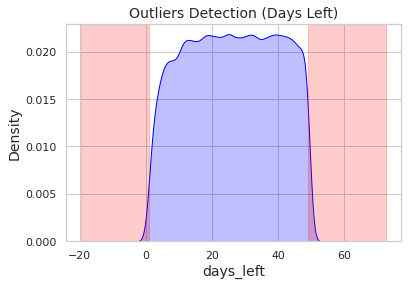

In [30]:
f, ax = plt.subplots()
sns.kdeplot(x=data.days_left, color='b', shade=True)
plt.axvspan(xmin=daysLeftOurliers['lowerWhisker'], xmax=data.days_left.min(), alpha=0.2, color='r')
plt.axvspan(xmin=daysLeftOurliers['upperWhisker'], xmax=data.days_left.max(), alpha=0.2, color='r')

plt.title('Outliers Detection (Days Left)')
plt.show()

**Price**

In [31]:
priceOutliers = findOutliers(data, 'price')

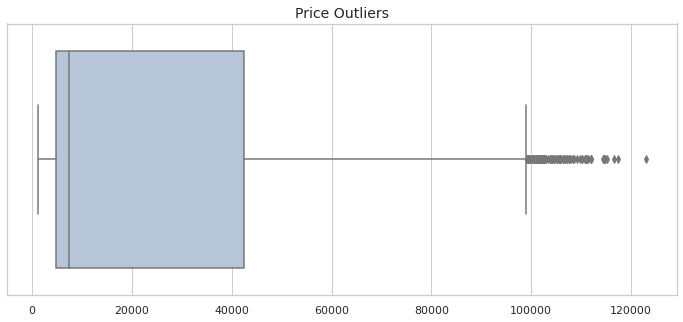

In [32]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style('whitegrid') 

sns.boxplot(x='price', data=data, color='lightsteelblue')

ax.set_title('Price Outliers')
ax.set_xlabel('')
plt.show()

Airline ticket prices show an outlier/ data value that is far from other data values ​​at prices above 100,000 (business class passenger ticket prices).

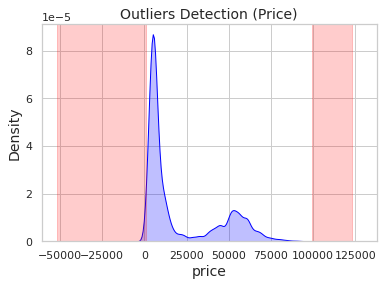

In [33]:
f, ax = plt.subplots()
sns.kdeplot(x=data.price, color='b', shade=True)
plt.axvspan(xmin=priceOutliers['lowerWhisker'], xmax=data.price.min(), alpha=0.2, color='r')
plt.axvspan(xmin=priceOutliers['upperWhisker'], xmax=data.price.max(), alpha=0.2, color='r')

plt.title('Outliers Detection (Price)')
plt.show()

## Correlation

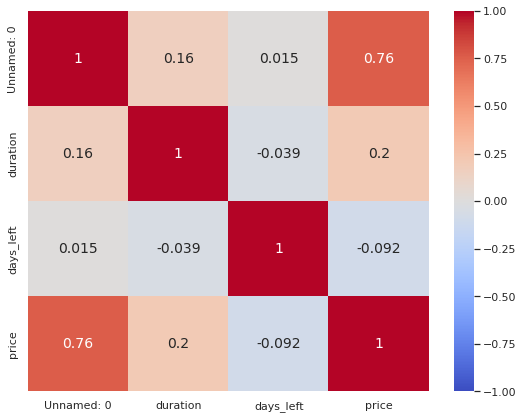

In [23]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, vmin = -1, vmax =1)
plt.show()

Relationship between numerical variables, especially the relationship between the target variable (price) and each feature. Based on the heatmap, it can be seen that:
* The longer the trip (duration), the higher the ticket price. However, this relationship is not that significant. [corr = 0.2]
* The farther the ticket purchase is from the day of departure, the cheaper the ticket price will be. However, this relationship is not significant. [corr = -0.092]

## What is the difference in ticket prices between **Economy** and **Business** class?

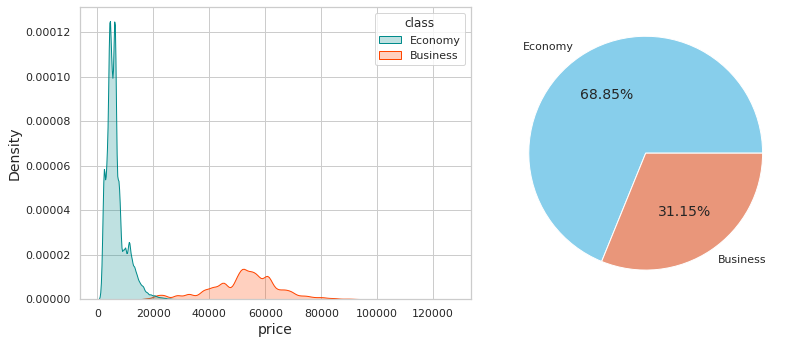

In [34]:
fig, ax = plt.subplots(figsize=(12,5))
fig.tight_layout(pad=2)
sns.set_style('whitegrid') 

plt.subplot(1,2,1)
palette_=['darkcyan','orangered']
sns.kdeplot(x='price', hue='class', data=data, palette=palette_, shade=True)
plt.subplot(1,2,2) 
colors_=['skyblue','darksalmon']
class_ = data['class'].value_counts()
plt.pie(class_, labels=class_.index, autopct='%.2f%%', colors=colors_)
plt.tight_layout()

* There is a **very significant difference** in ticket prices for economy and business class passengers. 
* The average price for economy class is 6,572 while the price for business class is 52,540.
* The data is dominated by economy class with a percentage exceeding 50% with economy class prices ranging from 1,105 to 42,349 and business class prices are from 12,000 to 123,071.

In [35]:
data.groupby('class')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Business,93487.0,52540.081124,12969.314606,12000.0,45185.0,53164.0,60396.0,123071.0
Economy,206666.0,6572.342383,3743.519517,1105.0,4173.0,5772.0,7746.0,42349.0


## Does the ticket price vary with **Airline**?

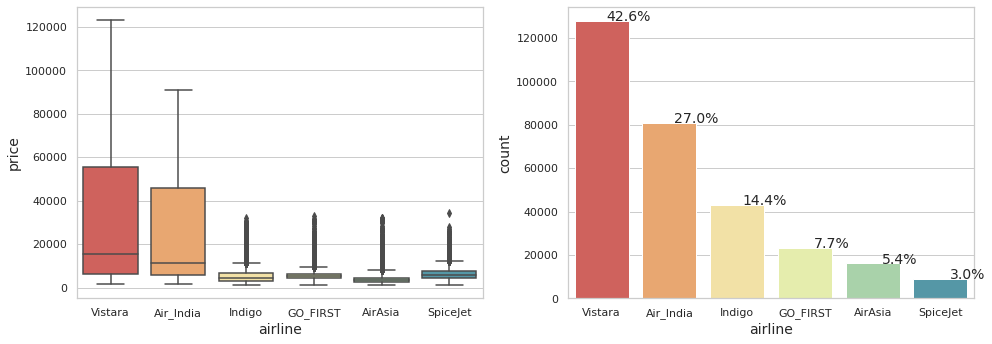

In [36]:
fig, ax = plt.subplots(figsize=(14,5))
fig.tight_layout(pad=2)
sns.set_style('whitegrid') 

plt.subplot(1,2,1)
order_airline = ['Vistara','Air_India','Indigo','GO_FIRST','AirAsia','SpiceJet']
sns.boxplot(y='price', x='airline', data=data, palette='Spectral', order=order_airline)
plt.subplot(1,2,2) 
total = float(len(data))
airline_ = sns.countplot(x='airline', data=data, order=data['airline'].value_counts().index, palette='Spectral', orient='h')
for p in airline_.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    airline_.annotate(percentage, (x, y),ha='center')
plt.tight_layout()

* Yes, it does. **The ticket price vary with Airline**.
* Of the 6 airlines, there is a significant difference between Vistara & Air India and other airlines in terms of ticket prices and number of passengers or data.
* The average ticket price for Vistara is 30,396 & Air India 23,507 whereas other airlines are even less than 7,000.

In [37]:
data.groupby('airline')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
AirAsia,16098.0,4091.072742,2824.055172,1105.0,2361.0,3276.0,4589.0,31917.0
Air_India,80892.0,23507.019112,20905.116909,1526.0,5623.0,11520.0,45693.0,90970.0
GO_FIRST,23173.0,5652.007595,2513.865560,1105.0,4205.0,5336.0,6324.0,32803.0
Indigo,43120.0,5324.216303,3268.894831,1105.0,3219.0,4453.0,6489.0,31952.0
SpiceJet,9011.0,6179.278881,2999.630406,1106.0,4197.0,5654.0,7412.0,34158.0
Vistara,127859.0,30396.536302,25637.159445,1714.0,6412.0,15543.0,55377.0,123071.0


## Is the ticket price affected by the number of transit flights **(Stops)**?

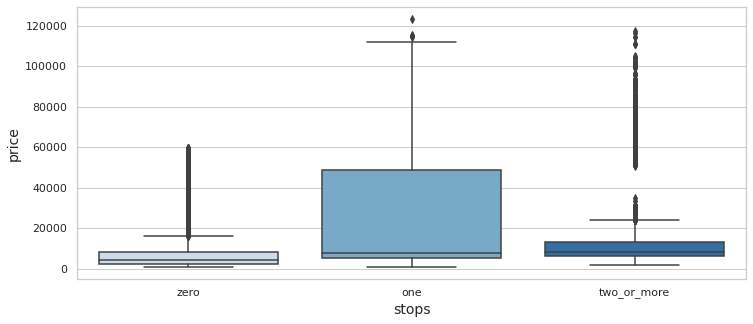

In [38]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style('whitegrid') 

sns.boxplot(y='price', x='stops', data=data, palette='Blues')
plt.show()

* Yes, it is. But, **the price is not greatly affected by the number of stops**.
* It can be seen that prices tend to be higher for 1 transit with average 22,900, while for direct flights with average 9,375 & 2 or more transits with average 14,113 prices tend to be lower.

In [39]:
data.groupby('stops')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
stops,,,,,,,,
one,250863.0,22900.992482,23626.066584,1105.0,5136.0,7959.0,48851.0,123071.0
two_or_more,13286.0,14113.450775,17664.332033,1966.0,6432.0,8307.0,13419.0,117307.0
zero,36004.0,9375.938535,10623.008293,1105.0,2586.0,4499.0,8064.0,59573.0


## Is the ticket price affected by the **Duration** of flights?

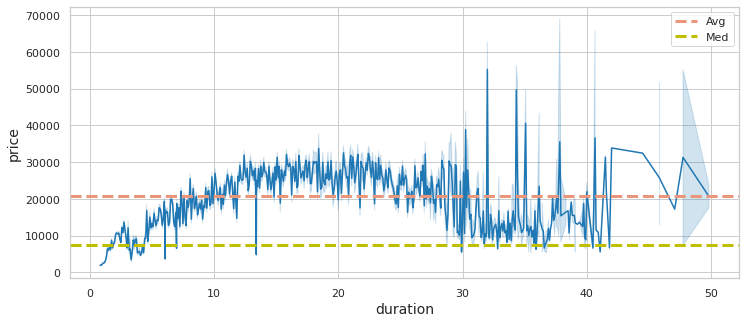

In [40]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style('whitegrid') 

sns.lineplot(x='duration', y='price', data=data, palette='mako', estimator=np.mean)
plt.axhline(y=np.nanmean(data['price']), color='darksalmon', linestyle='--', linewidth=3, label='Avg' )
plt.axhline(y=np.nanmedian(data['price']), color='y', linestyle='--', linewidth=3, label='Med' )
plt.legend()
plt.show()

* Yes, it is. **The ticket price is affected by the duration of flights**.
* The duration shows that the price gets higher the longer the trip, but the price starts to decrease at 30 hours duration and so on.
* However, for a duration of more than 30 hours there are several prices that increase, possibly influenced by the number of transits.

In [41]:
data['duration'].describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

In [42]:
d_dur = data
bins = [0,10,20,30,40,50]
group_names = ['0-10','10-20','20-30','30-40','40-50']
d_dur['duration_range'] = pd.cut(data['duration'], bins, labels=group_names)
d_dur

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_range
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0-10
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0-10
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0-10
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0-10
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,10-20
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,10-20
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,10-20
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,0-10


In [43]:
d_dur.groupby('duration_range')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
duration_range,,,,,,,,
0-10,130274.0,14890.193646,19067.990361,1105.0,3999.0,5954.0,13547.0,114705.0
10-20,119124.0,25730.403546,24716.252439,1105.0,5656.0,9879.0,51707.0,123071.0
20-30,48529.0,25275.706258,22885.133880,2491.0,5960.0,11415.0,49553.0,116562.0
30-40,2178.0,17383.022957,17030.753420,4363.0,7545.0,12083.0,15690.0,96617.0
40-50,48.0,14908.812500,13262.826820,5601.0,7207.0,11145.0,13915.5,65674.0


## Does the ticket price change based on **Departure Time** and **Arrival Time**?

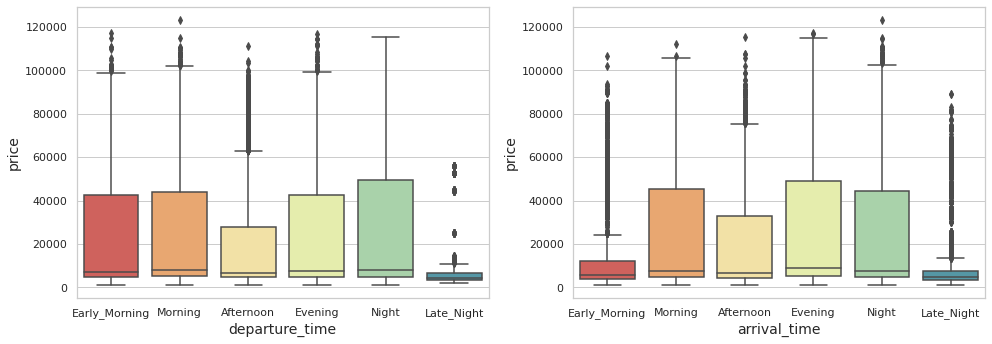

In [44]:
fig, ax = plt.subplots(figsize=(14,5))
fig.tight_layout(pad=2)
sns.set_style('whitegrid') 

plt.subplot(1,2,1)
order_ = ['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night']
sns.boxplot(y='price', x='departure_time', data=data, palette='Spectral', order=order_)
plt.subplot(1,2,2) 
sns.boxplot(y='price', x='arrival_time', data=data, palette='Spectral', order=order_)
plt.tight_layout()

* Yes, it does. But, there is no significant price difference in flight time from the earliest time (early morning) to the latest (late night).
* A significant price difference only occurs at:
1. Departure time: Late night price (average = 9,295) tend to be lower than other times (average = 18,000-24,000).
2. Arrival time: Early morning (average = 14,993) & late night (average = 11,284) tend to be lower than other times (average = 18,000-23,000).


In [45]:
data.groupby('departure_time')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
departure_time,,,,,,,,
Afternoon,47794.0,18179.203331,20928.840445,1105.0,4593.0,6663.0,27976.0,111437.0
Early_Morning,66790.0,20370.676718,22354.875275,1105.0,4757.0,7212.0,42424.0,117307.0
Evening,65102.0,21232.361894,23168.515406,1105.0,4593.0,7425.0,42521.0,116562.0
Late_Night,1306.0,9295.299387,13680.515549,2050.0,3393.0,4499.0,6459.5,56058.0
Morning,71146.0,21630.760254,22968.909569,1105.0,5208.0,8112.0,43865.0,123071.0
Night,48015.0,23062.146808,23617.883277,1105.0,4731.0,7813.0,49553.0,115211.0


In [46]:
data.groupby('arrival_time')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
arrival_time,,,,,,,,
Afternoon,38139.0,18494.598993,20430.012514,1105.0,4542.0,6714.0,32923.0,115211.0
Early_Morning,15417.0,14993.139521,18898.694495,1105.0,3988.0,5800.0,12108.0,106416.0
Evening,78323.0,23044.371615,23494.642663,1105.0,5395.0,8854.0,49177.0,117307.0
Late_Night,14001.0,11284.906078,16399.121594,1105.0,3336.0,4867.0,7488.0,89257.0
Morning,62735.0,22231.076098,23266.076096,1105.0,4792.0,7687.0,45257.0,111964.0
Night,91538.0,21586.758341,23298.011624,1105.0,4979.0,7584.0,44280.0,123071.0


## How does the ticket price affect if it is purchased far or near departure (**Days Left**)?

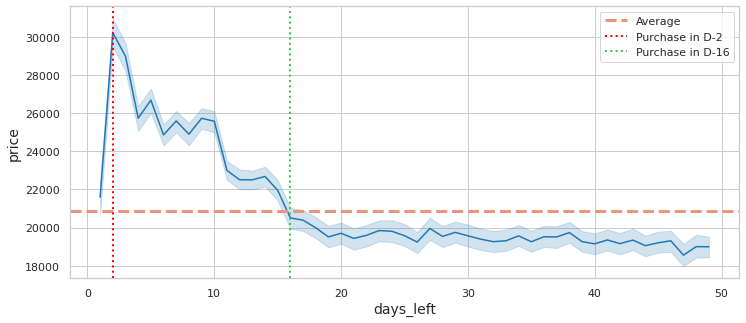

In [47]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style('whitegrid') 

sns.lineplot(x='days_left', y='price', data=data, palette='mako')
plt.axhline(y=np.nanmean(data['price']), color='darksalmon', linestyle='--', linewidth=3, label='Average' )
plt.axvline(x=2, color='red', linestyle='dotted', linewidth=2, label='Purchase in D-2')
plt.axvline(x=16, color='limegreen', linestyle='dotted', linewidth=2,  label='Purchase in D-16')
plt.legend()
plt.show()

It can be seen that: 
* On D-1 purchases, ticket prices are slightly higher than the average.
* However, on D-2 the price increased drastically.
* And decreased from H-3 to H-15.
* Then, H-16 and so on ticket prices are below the average price.

In [48]:
data.groupby('days_left')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
days_left,,,,,,,,
1,1927.0,21591.867151,19285.046391,4452.0,11524.50,15163.0,20681.00,116562.0
2,4026.0,30211.299801,24420.921122,1977.0,12054.00,18017.5,54306.00,114523.0
3,4248.0,28976.083569,24621.112460,3361.0,11255.00,16333.0,51376.00,123071.0
4,5077.0,25730.905653,23120.423062,3362.0,9534.00,13054.0,45883.00,110936.0
5,5392.0,26679.773368,24002.599834,3361.0,9281.50,13054.0,49157.50,117307.0
6,5740.0,24856.493902,22200.882490,3361.0,9146.00,12417.5,45618.00,105961.0
7,5703.0,25588.367351,22767.025911,3361.0,9201.00,12990.0,47362.00,105744.0
8,5767.0,24895.883995,21711.801725,3361.0,9178.00,12658.0,45883.00,102114.0
9,5665.0,25726.246072,21533.952229,3197.0,9879.00,13947.0,45883.00,98465.0


## How prices change accordingly **Source City** and **Destination City**?

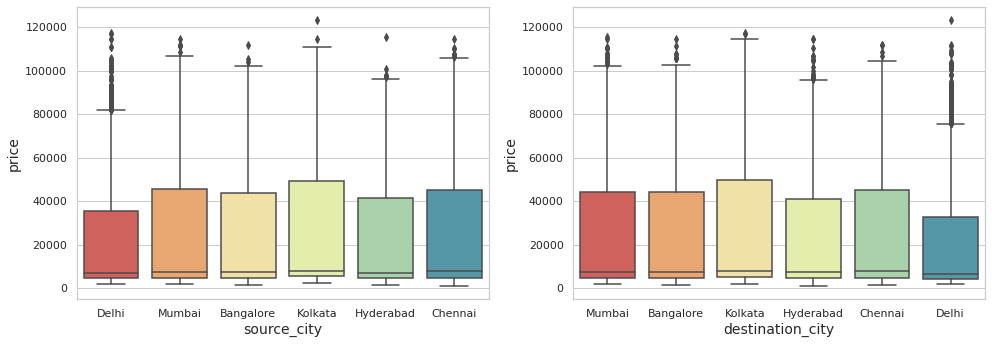

In [49]:
fig, ax = plt.subplots(figsize=(14,5))
fig.tight_layout(pad=2)
sns.set_style('whitegrid') 

plt.subplot(1,2,1)
sns.boxplot(y='price', x='source_city', data=data, palette='Spectral')
plt.subplot(1,2,2) 
sns.boxplot(y='price', x='destination_city', data=data, palette='Spectral')
plt.tight_layout()

* The boxplots show no significant price difference between the city of source and destination.
* The average price per city ranges from 18,000-22,000.
* Prices that are far from the average mare probably the prices for business class passengers.

In [50]:
data.groupby('source_city')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
source_city,,,,,,,,
Bangalore,52061.0,21469.460575,23171.386433,1603.0,4687.0,7488.0,43865.0,111883.0
Chennai,38700.0,21995.339871,23527.227014,1105.0,4672.0,7846.0,45185.0,114704.0
Delhi,61343.0,18951.326639,20920.410359,1998.0,4496.0,6840.0,35490.0,117307.0
Hyderabad,40806.0,20155.623879,21720.652723,1543.0,4593.0,6855.0,41314.0,115211.0
Kolkata,46347.0,21746.235679,23439.972854,2436.0,5853.0,7958.0,49207.0,123071.0
Mumbai,60896.0,21483.818839,23394.131784,1890.0,4658.0,7413.0,45693.0,114523.0


In [51]:
data.groupby('destination_city')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
destination_city,,,,,,,,
Bangalore,51068.0,21593.955784,23271.409165,1443.0,4727.75,7425.0,44144.0,114523.0
Chennai,40368.0,21953.323969,23189.300129,1543.0,4672.00,7900.0,45257.0,111964.0
Delhi,57360.0,18436.767870,20485.727116,2051.0,4439.00,6521.0,32923.0,123071.0
Hyderabad,42726.0,20427.661284,21840.231366,1105.0,4589.00,7548.0,41064.0,114705.0
Kolkata,49534.0,21959.557556,23750.590141,2056.0,5293.25,7767.0,49725.0,117307.0
Mumbai,59097.0,21372.529469,23409.185278,1830.0,4792.00,7496.0,44025.0,115211.0
